In [73]:
import pandas as pd 
import numpy as np
import yfinance as yf
import pandas_market_calendars as mcal
from datetime import datetime
import matplotlib.pyplot as plt
import pytz

In [93]:
df = yf.download('AAPL', start='2024-01-01', end='2024-01-31', interval="1h")
df.index = pd.DatetimeIndex(df.index.strftime("%Y-%m-%d %H:%M"))
df = df.dropna()
start = df.index[0]
end = df.index[-1]

[*********************100%%**********************]  1 of 1 completed


In [79]:
holidays = mcal.get_calendar('NASDAQ').holidays()
holidays = list(holidays.holidays) # NYSE Holidays
holidays[:5]

[numpy.datetime64('1885-01-01'),
 numpy.datetime64('1885-02-23'),
 numpy.datetime64('1885-04-03'),
 numpy.datetime64('1885-05-30'),
 numpy.datetime64('1885-07-04')]

In [80]:
edt_tz = pytz.timezone('US/Eastern')
day_diff = np.busday_count(start.date(), end.date() + pd.Timedelta(days=1), holidays=holidays)
day_diff

20

In [83]:
oc = np.zeros((len(df) + day_diff, ))
# open values
oc[::8] = df.loc[::7, "Open"]
# close values
idx = np.ones((len(oc), ), dtype=bool)
idx[::8] = False
oc[idx] = df.loc[:, "Adj Close"]

In [84]:
# setting index for middle of day
idx = np.ones((len(oc), ), dtype=bool)
idx[7::8] = False
dates = np.zeros(oc.shape, dtype="datetime64[ns]")
dates[idx] = df.index
# setting index for end of day
later_index = df.index + pd.Timedelta(minutes=30)
dates[~idx] = later_index[6::7]
new_df = pd.DataFrame(data=oc, index=dates, columns=["Price"])

<Axes: >

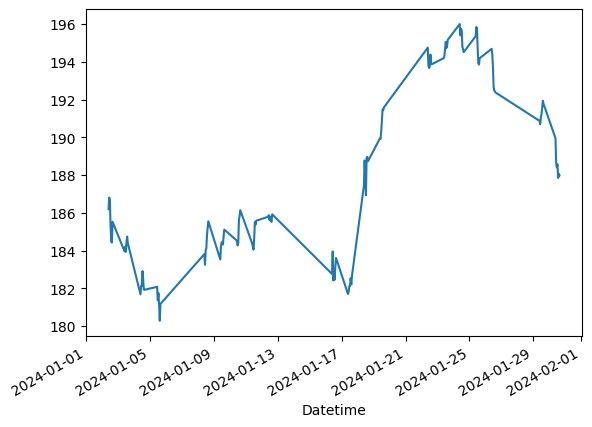

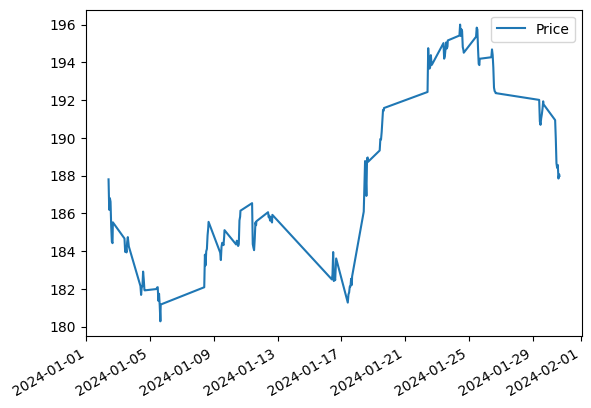

In [92]:
df["Adj Close"].plot()
new_df.plot()